# **Yulu : Hypothesis Testing**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

--2024-09-20 08:40:35--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.65.68, 13.226.65.51, 13.226.65.32, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.65.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  2.22MB/s    in 0.3s    

2024-09-20 08:40:36 (2.22 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [ ]:
df = pd.read_csv("/content/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**4 a. Examine dataset structure, characteristics, and statistical
summary**

In [ ]:
# checkin no of rows and column
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**5 Identify missing values and perform Imputation using an appropriate method.**

In [ ]:
# checking null values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**6 c. Identify and remove duplicate records.**

In [ ]:
# checking duplicate values
df.duplicated().sum()

0

Insights:

• Dataset doesn’t have null values.

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

season (1: spring,
2: summer,
3: fall,
4: winter)

In [ ]:
df['holiday'].unique()

array([0, 1])

whether day is a holiday or not

In [ ]:
df['workingday'].unique()

array([0, 1])

if day is neither weekend nor holiday is 1, otherwise is 0.


In [ ]:
df['weather'].unique()

array([1, 2, 3, 4])

• 1: Clear, Few clouds, partly cloudy

• 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

• 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

• 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df['year']=df['datetime'].dt.year
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [ ]:
col = ['season','holiday','workingday','weather'] # converting all col into␣ categorical datatype
for i in col:
  df[i]=df[i].astype('category')

In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


**7 d. Analyze the distribution of Numerical & Categorical variables, separately**

**8 Univariate Analysis**

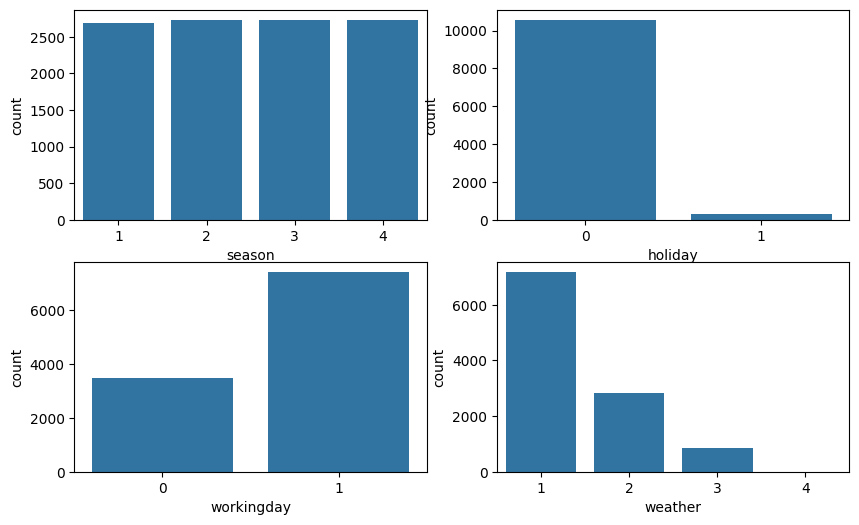

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
sns.countplot(x='season',data=df,ax=ax[0,0])
sns.countplot(x='holiday',data=df,ax=ax[0,1])
sns.countplot(x='workingday',data=df,ax=ax[1,0])
sns.countplot(x='weather',data=df,ax=ax[1,1])
plt.show()

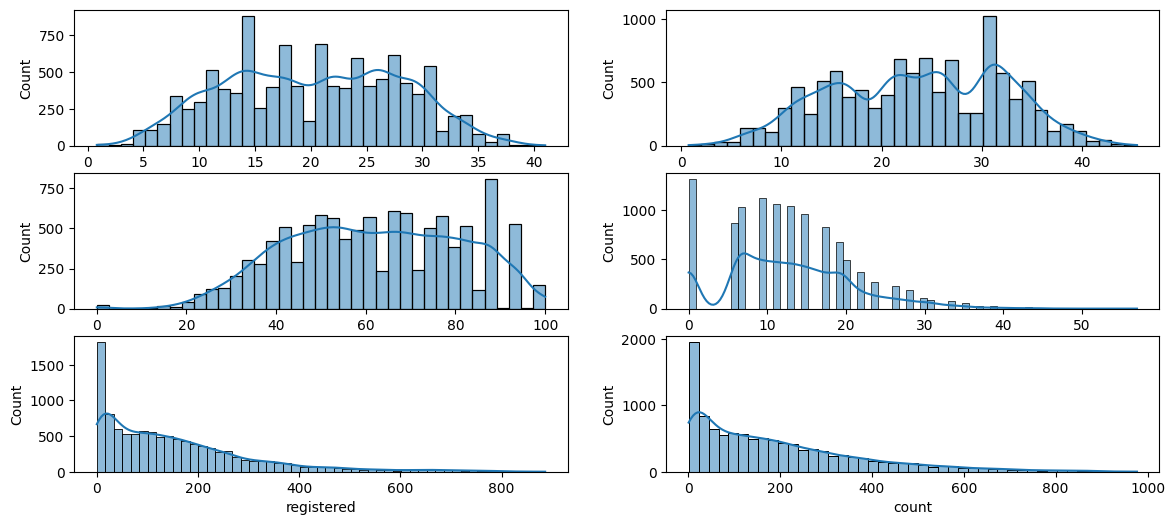

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(14,6))
sns.histplot(x='temp',data=df,ax=ax[0,0],kde=True)
sns.histplot(x='atemp',data=df,ax=ax[0,1],kde=True)
sns.histplot(x='humidity',data=df,ax=ax[1,0],kde=True)
sns.histplot(x='windspeed',data=df,ax=ax[1,1],kde=True)
sns.histplot(x='registered',data=df,ax=ax[2,0],kde=True)
sns.histplot(x='count',data=df,ax=ax[2,1],kde=True)
plt.show()

**9 Check for Outliers and deal with them accordingly.**

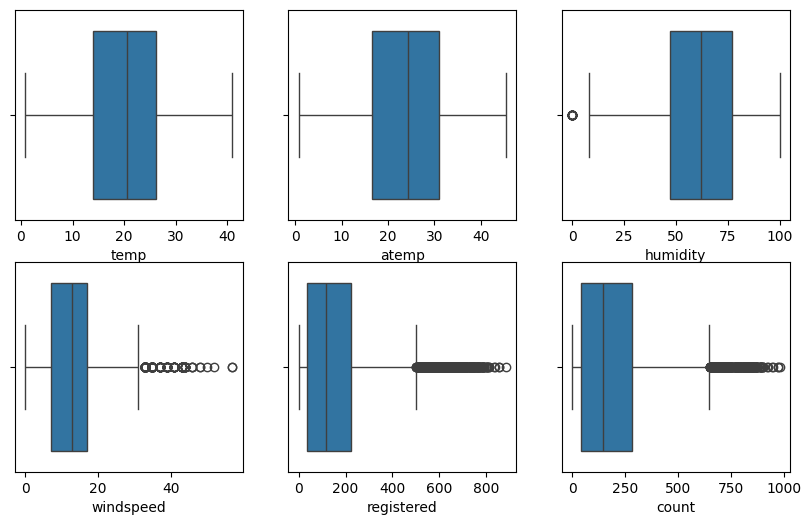

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(10,6))
sns.boxplot(x='temp',data=df,ax=ax[0,0])
sns.boxplot(x='atemp',data=df,ax=ax[0,1])
sns.boxplot(x='humidity',data=df,ax=ax[0,2])
sns.boxplot(x='windspeed',data=df,ax=ax[1,0])
sns.boxplot(x='registered',data=df,ax=ax[1,1])
sns.boxplot(x='count',data=df,ax=ax[1,2])
plt.show()

**10 Remove/Clip existing outliers as necessary.**


temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
dtype: float64
Shape of data after removing outliers: (9518, 13)


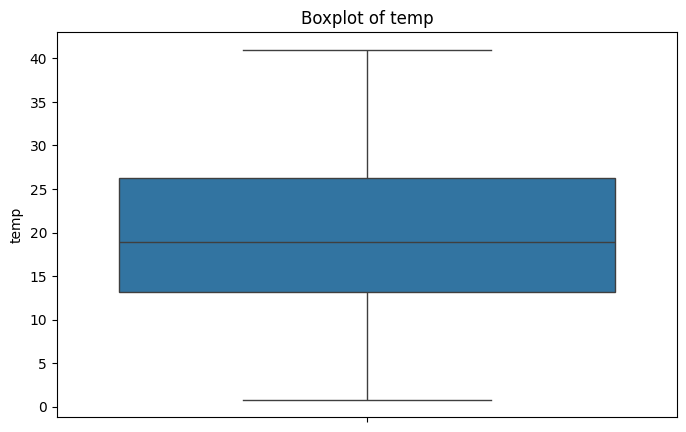

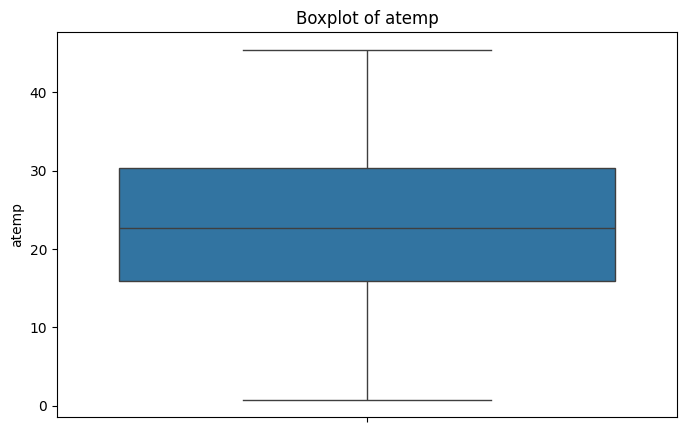

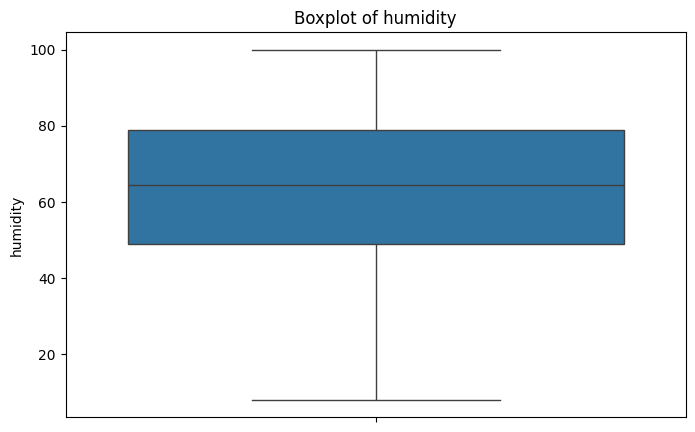

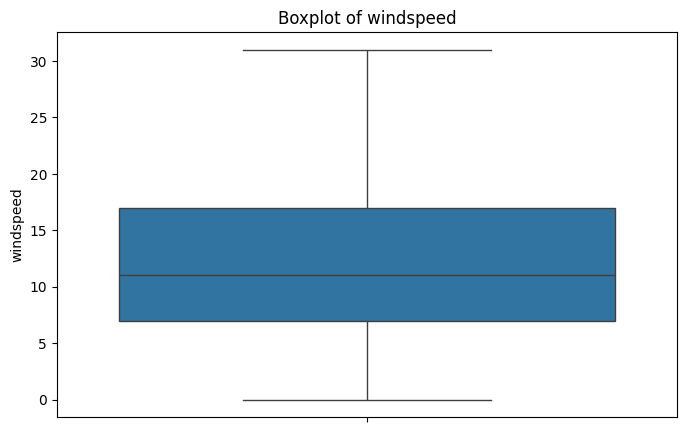

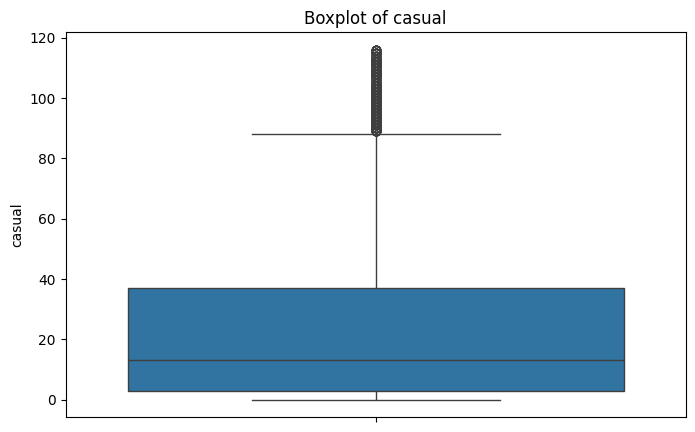

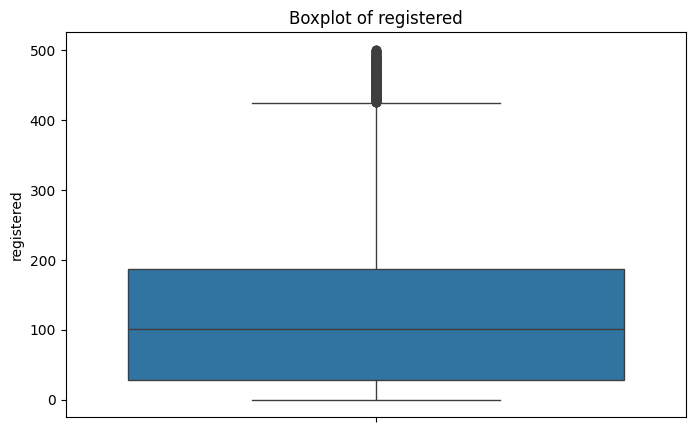

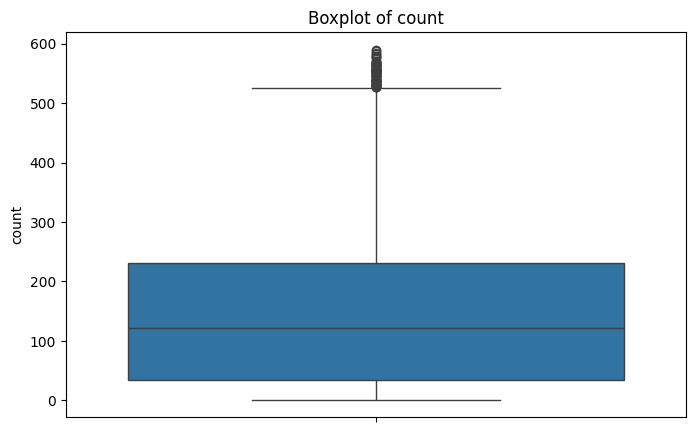

In [ ]:
#Removing Outliers using IQR Method
numerical_cols=['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered', 'count']
data_num=df[numerical_cols]
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR=Q3-Q1
print(IQR)
data=df[~((data_num<(Q1-1.5*IQR)) | (data_num>(Q3+1.5*IQR))).any(axis=1)]
print('Shape of data after removing outliers:',data.shape)
#Box plot after removing outliers
for col in numerical_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(data[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

**11 Try establishing a Relationship between the Dependent and
Independent Variables.**

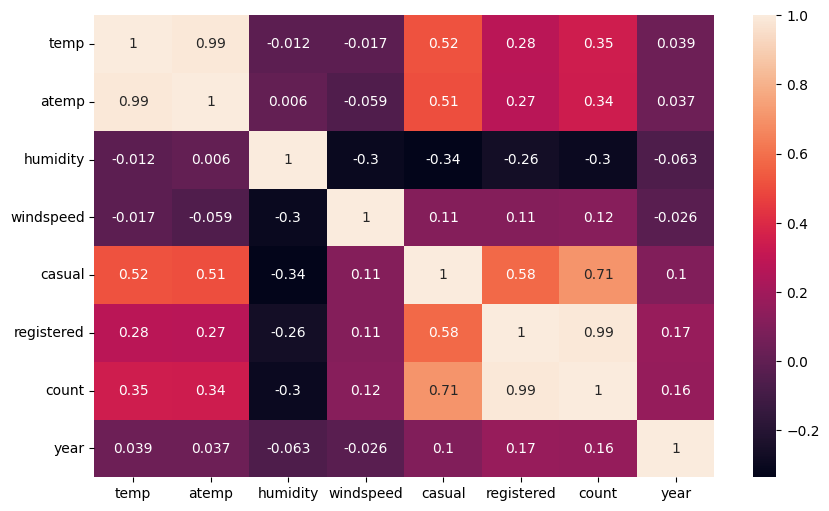

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

**Insights:**

  Here, count column seems to have positive correlation with atemp and and negative with humidity.
Although they around only 30-40%. But we can see people go out with bike more when the temp
is high and humidity is low. Seems expected.


**12 Remove the highly correlated variables, if any.**

In [ ]:
data = df.drop(columns=['casual', 'registered', 'atemp'])

**13 Hypothesis Testing:**

**14 Check if there any significant difference between the no. of
bike rides on Weekdays and Weekends?**


In [ ]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, chisquare,chi2_contingency
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import kruskal
from statsmodels.api import qqplot
warnings.filterwarnings("ignore")

**15 HO:There is no significant difference between no. of bike rides
on weekdays and no. of bike rides on weekend.**

**16 H1:There is a significant difference between no. of bike rides
on weekdays and no. of bike rides on weekend.**

**17 b. Select an appropriate test - A t-test looks at two sets of data that are different from each other, with no standard deviation or
variance. And in the Problem,we are talking about two independent groups.So we will apply the
2- Sample Independent T-test**


In [ ]:
# c. Set a significance level**
alpha = 0.05
Weekdays=data[data['workingday']==1]['count']
Weekends=data[data['workingday']==0]['count']
tstats,p_value=ttest_ind(Weekdays,Weekends)
print('t_Statistics:',tstats)
print('p_value:',p_value)
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('There is a significant difference between no. of bike rides on weekdays and no. of bike rides on weekend.')
else:
  print('Fail to reject Null Hypothesis')
  print('There is no significant difference between no. of bike rides on␣ weekdays and no. of bike rides on weekend.')

t_Statistics: 1.2096277376026694
p_value: 0.22644804226361348
Fail to reject Null Hypothesis
There is no significant difference between no. of bike rides on␣ weekdays and no. of bike rides on weekend.


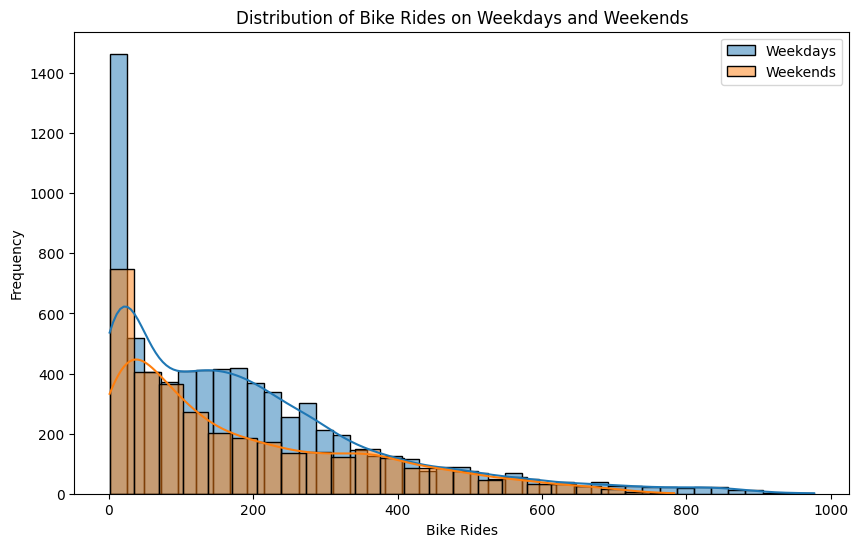

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(Weekdays, label='Weekdays', kde=True)
sns.histplot(Weekends, label='Weekends', kde=True)
plt.title('Distribution of Bike Rides on Weekdays and Weekends')
plt.xlabel('Bike Rides')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**18 Check if the demand of bicycles on rent is the same for different
Weather conditions?**

In [ ]:
# H0: Weathers has No effect on number of electric cycles rented
# H1: Weathers has effect on number of electric cycles rented
gp1 = data[data['weather']==1]['count']
gp2 = data[data['weather']==2]['count']
gp3 = data[data['weather']==3]['count']
gp4 = data[data['weather']==4]['count']
gp5 = data[data['season']==1]['count']
gp6 = data[data['season']==2]['count']
gp7 = data[data['season']==3]['count']
gp8 = data[data['season']==4]['count']

**19 Here we will use ANOVA test**

In [ ]:
from scipy import stats
stats.f_oneway(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

**Insights:**

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of
cycles rented is not similar in different weather and season conditions


**20 5. Check if the demand of bicycles on rent is the same for
different Seasons?**

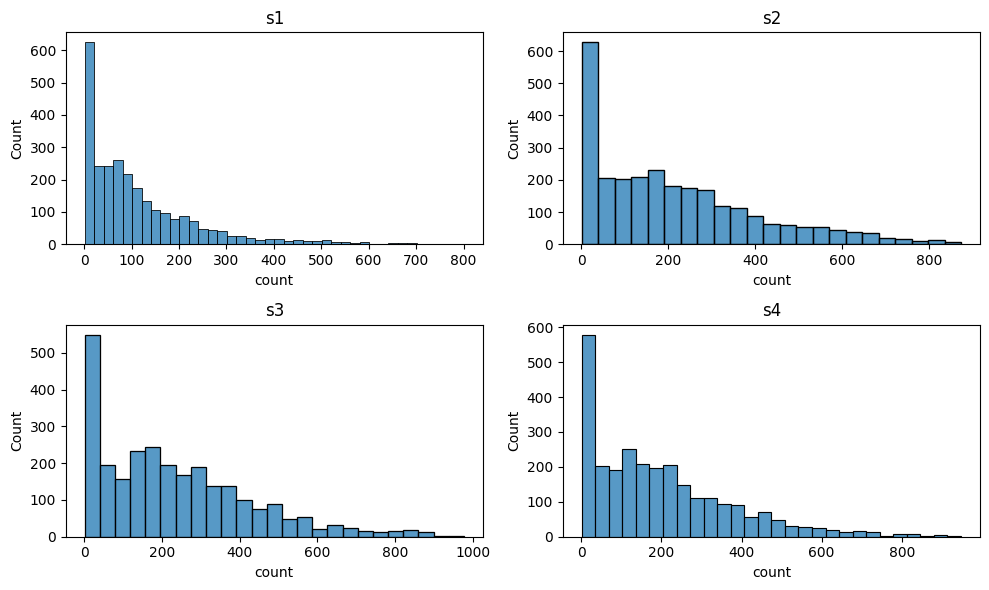

In [ ]:
# H0 = There is no significant difference in the demand for bicycles on rent across different seasons.
# H1 = There is a significant difference in the demand for bicycles on rent across different seasons.
s1=data[data['season']==1]['count']
s2=data[data['season']==2]['count']
s3=data[data['season']==3]['count']
s4=data[data['season']==4]['count']
plt.figure(figsize=(10, 6))
seasons = [s1, s2, s3, s4]
for i, season in enumerate(seasons):
  plt.subplot(2, 2, i+1)
  sns.histplot(season)
  plt.title(f's{i+1}')
plt.tight_layout()
plt.show()

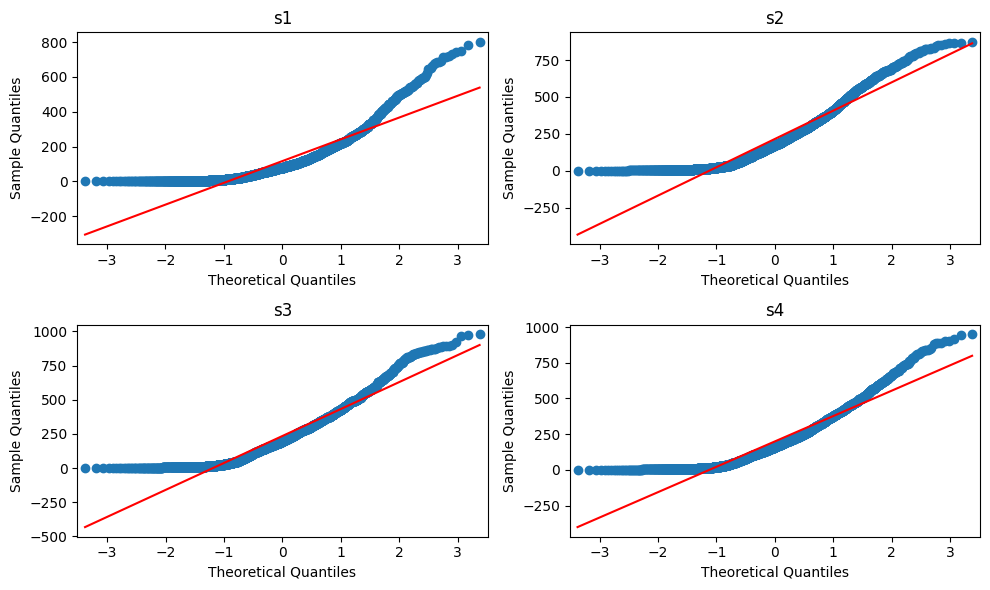

In [ ]:
# QQ-Plot
plt.figure(figsize=(10, 6))
for i, season in enumerate(seasons):
  plt.subplot(2, 2, i+1)
  qqplot(season,line='s',ax=plt.gca())
  plt.title(f's{i+1}')
plt.tight_layout()
plt.show()

In [ ]:
#Levene's test for equality of variance
stats,p_value=levene(s1,s2,s3,s4)
print('Test statistic:',stats)
print('p-value:',p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Variance of the groups are not equal')
else:
  print('Fail to reject Null Hypothesis')
  print('Variance of the groups are equal')

Test statistic: 187.7706624026276
p-value: 1.0147116860043298e-118
Reject Null Hypothesis
Variance of the groups are not equal


In [ ]:
#Perform Kruskal-Walis Test
stats,p_value=kruskal(s1,s2,s3,s4)
print('Test statistic:',stats)
print('p-value:',p_value)
#e. Decide whether to accept or reject the Null Hypothesis.
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('There is a significant difference in the demand for bicycles on rent across different seasons.')
else:
  print('Fail to reject Null Hypothesis')
  print('There is no significant difference in the demand for bicycles on rent across different seasons.')

Test statistic: 699.6668548181988
p-value: 2.479008372608633e-151
Reject Null Hypothesis
There is a significant difference in the demand for bicycles on rent across different seasons.


The results from the Kruskal-Wallis H-test show a significant difference in demand for bicycles
across different seasons.
The visualizations support the findings, providing a comprehensive understanding of how seasons
affect bicycle demand.

**Insights -** In summer and fall seasons more bikes are rented as compared to other seasons. -
Whenever its a holiday more hikes are renteri - It is also clear from the workingday also that
whenever day is holiday or weekend, slightly more bikes were rented. - Whenever there is rain,
thunderstorm, snow or fog, there were less bikes were rented. - Whenever the humidity is less than
20, number of bikes rented is very very low. Whenever the temperature is less than 10. number of
bikes rented is less - Whenever the windspeed is greater than 35, number of bikes rented is less.


**21 . Check if the Weather conditions are significantly different
during different Seasons?**

**Null Hypothesis (H0):** The weather conditions are not dependent on different seasons.

**Alternative Hypothesis (H1):** The weather conditions are dependent on different seasons.

In [ ]:
weather_category = {1: 'sunny-pleasant',
2: 'cloudy-delightful',
3: 'rainy-drenching'}
data['weather_encoded'] = data['weather'].map(weather_category)
season_category = {1: 'spring',
2: 'summer',
3: 'fall',
4: 'winter'}

In [ ]:
data['season_encoded'] = data['season'].map(season_category)
# chisquare test is appropriate for Analysis

In [ ]:
alpha=0.05
contigency_table = pd.crosstab(data['weather_encoded'], data['season_encoded'])
contigency_table

season_encoded,spring,summer,fall,winter
weather_encoded,,,,
cloudy-delightful,715,708,604,807
rainy-drenching,211,224,199,225
sunny-pleasant,1759,1801,1930,1702


In [ ]:
# chisquare test is appropriate for Analysis
stats,p_value,dof,expected=chi2_contingency(contigency_table)
print('Test statistic:',stats)
print('p-value:',p_value)
#e. Decide whether to accept or reject the Null Hypothesis.
if p_value<alpha:
  print('Reject Null Hypothesis')
  print('The weather conditions are dependent on different seasons.')
else:
  print('Fail to reject Null Hypothesis')
  print('The weather conditions are not dependent on different seasons.')

Test statistic: 46.10145731073249
p-value: 2.8260014509929343e-08
Reject Null Hypothesis
The weather conditions are dependent on different seasons.


**Insights:**
p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough
statistical evidence to say that the weather conditions are dependent on the ongoing season.

**22 Recommendations**

• Advertise the bikes differently in each season. For example, highlight summer promotions in
June, July, and August when more people want to ride bikes.

• Change promotions or discounts based on the weather. If it’s rainy, for example, offer special
deals to encourage more people to use the bikes.

• Invest in technology and infrastructure to improve the overall user experience, including app
features, bike maintenance, and customer support, fostering loyalty and repeat business.

• Concentrate bike deployment efforts during peak months, especially in June, July, and August,
to meet increased demand and capitalize on favorable weather conditions.

• In summer and fall seasons the company should have more bikes in stock to be rented. Because
the demand in these seasons is higher as compared to other seasons.

• Encourage customers to provide feedback and reviews on their biking experience. Collecting
feedback can help identify areas for improvement, understand customer preferences, and tailor
the services to better meet customer expectations.

• Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer
months when there is higher demand. Offer seasonal discounts or special packages to attract
more customers during these periods.